In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [79]:
df = pd.read_csv("Customer_Churn_Banker.csv")

In [80]:
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0,1,1,1,10134888,1
1,15647311,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,15619304,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,15701354,699,France,Female,39,1,0,2,0,0,9382663,0
4,15737888,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   credit_score      10000 non-null  int64 
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  int64 
 5   tenure            10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products_number   10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   active_member     10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


In [82]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,6.980471e+06,1.530200,0.70550,0.515100,9.089385e+06,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,6.285896e+06,0.581654,0.45584,0.499797,6.128208e+06,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,5.230000e+02,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,3.336751e+06,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,8.668510e+06,1.000000,1.00000,1.000000,8.890572e+06,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,1.246215e+07,2.000000,1.00000,1.000000,1.439529e+07,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,2.508981e+07,4.000000,1.00000,1.000000,1.999925e+07,1.000000


In [83]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x13996e86910>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

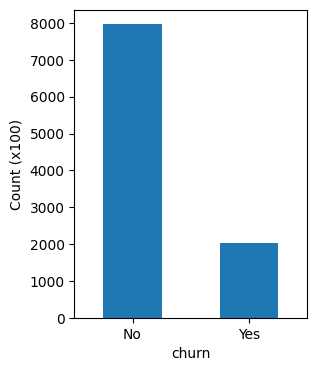

In [84]:
plt.figure(figsize=(3,4))
df['churn'].value_counts().plot.bar()
plt.xlabel('churn')
plt.ylabel('Count (x100)')
x=[0,1]
label=['No', 'Yes']
plt.xticks(x, label,rotation=0)
# y=[0,100,200,300,400,500]

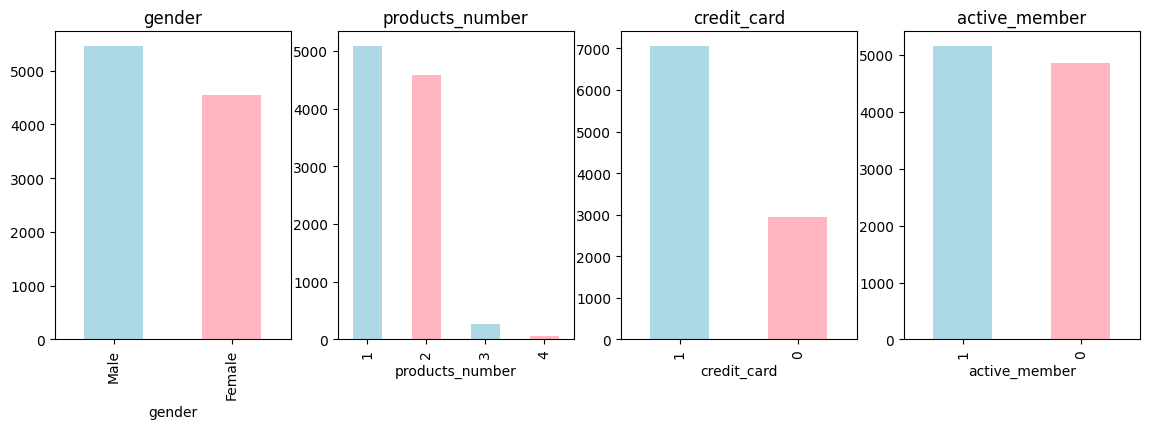

In [85]:
cols = ['gender', 'products_number', "credit_card", "active_member"]
numerical = cols

plt.figure(figsize=(14,4))

for i, col in enumerate(numerical):
  ax = plt.subplot(1, len(numerical), i+1)
  df[str(col)].value_counts().plot(kind='bar',color =['lightblue', 'lightpink'])
  ax.set_title(f"{col}")

<Axes: xlabel='churn', ylabel='tenure'>

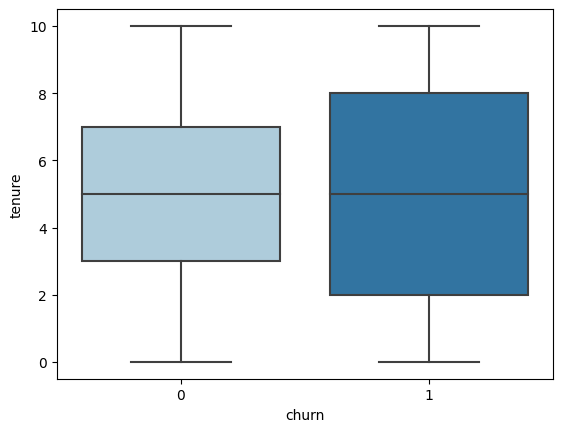

In [86]:
sns.boxplot(x='churn', y='tenure', data=df, palette="Paired", )


In [87]:
pd.unique(df['country'])

array(['France', 'Spain', 'Germany'], dtype=object)

<Axes: ylabel='churn'>

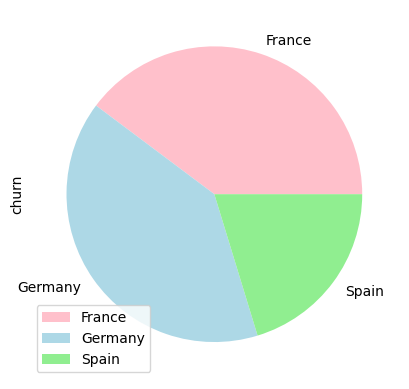

In [88]:
df3 = df[['country','churn']]
colors = ['pink', 'lightblue', 'lightgreen']
df3.groupby(['country']).sum().plot(kind='pie', y='churn', colors=colors)

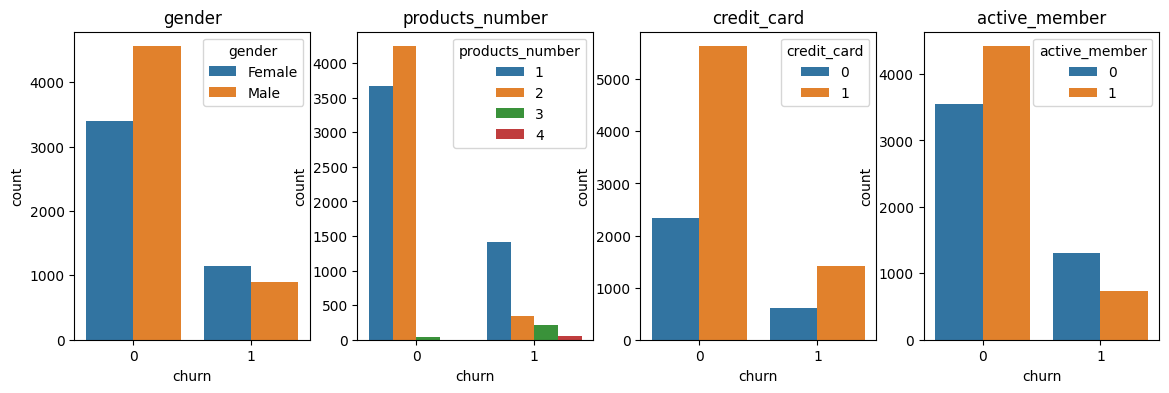

In [68]:
cols = ['gender', 'products_number', "credit_card", "active_member"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

In [69]:
df2 = df.drop(['customer_id','tenure','country','credit_score','age','estimated_salary','products_number','balance'],axis=1)

In [70]:
df2.head(5)

,gender,credit_card,active_member,churn
0,Female,1,1,1
1,Female,0,1,0
2,Female,1,0,1
3,Female,0,0,0
4,Female,1,1,0


In [71]:
import sys
!{sys.executable} -m pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [72]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = df2.apply(le.fit_transform)
df_cat.head()

,gender,credit_card,active_member,churn
0,0,1,1,1
1,0,0,1,0
2,0,1,0,1
3,0,0,0,0
4,0,1,1,0


In [73]:
num_features = df[['customer_id','tenure','country','credit_score','age','estimated_salary','products_number','balance']]

In [74]:
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

In [75]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customer_id','country'],axis=1)

X = finaldf.drop(['churn'],axis=1)
y = finaldf['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state=0)

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.79

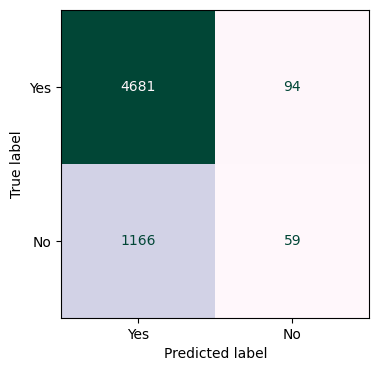

In [89]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['Yes', 'No']
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=0,
    ax=ax, colorbar=False, cmap="PuBuGn")

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4775
           1       0.39      0.05      0.09      1225

    accuracy                           0.79      6000
   macro avg       0.59      0.51      0.48      6000
weighted avg       0.72      0.79      0.72      6000



In [92]:
import site
site.getsitepackages()

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib\\site-packages']

In [93]:
# Xử lí mất cân bẳng dữ liệu

from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\maitu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6368333333333334

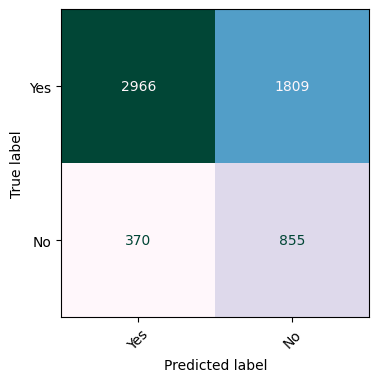

In [96]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['Yes', 'No']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn")

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      4775
           1       0.32      0.70      0.44      1225

    accuracy                           0.64      6000
   macro avg       0.61      0.66      0.59      6000
weighted avg       0.77      0.64      0.67      6000



In [98]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(max_depth=2)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [99]:
score_total=[]
for i in range(1,20):
  model_tree = tree.DecisionTreeClassifier(max_depth=i)
  model_tree.fit(X_train, y_train)
  y_pred=model_tree.predict(X_test)
  score_total.append(accuracy_score(y_test,y_pred)*100)

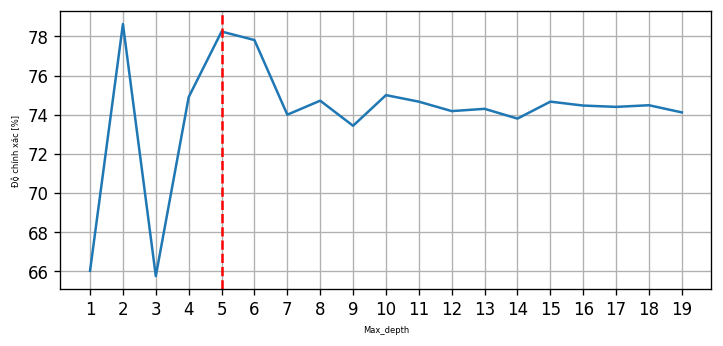

In [100]:
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
plt.ylabel('Độ chính xác [%]',fontsize=5)
plt.xlabel('Max_depth',fontsize=5)
plt.plot(range(1, 20), score_total)
plt.xticks(range(1, 20))
plt.axvline(x=5, color='r', linestyle='--')
plt.grid('minor')

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7533333333333333

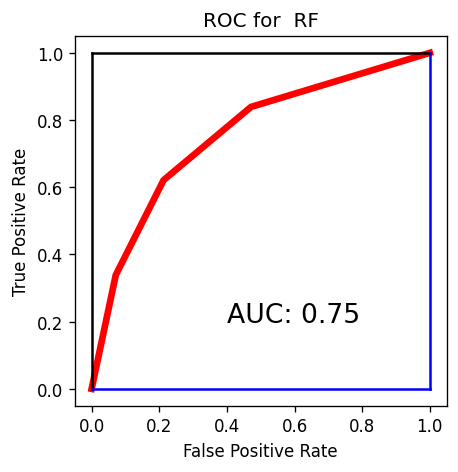

In [110]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = rf.predict_proba(X_test)[:,1] #Thay tên model phù hợp
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [111]:
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_space = {'max_depth':[3, 5, 10, None],
              'n_estimators':[10, 20, 30],
              'criterion':['gini','entropy'],
              }
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='accuracy')
model_grid = rf_grid.fit(X_train, y_train)

In [112]:
y_pred=model_grid.predict(X_test)
accuracy_score(y_test,y_pred)

0.8045

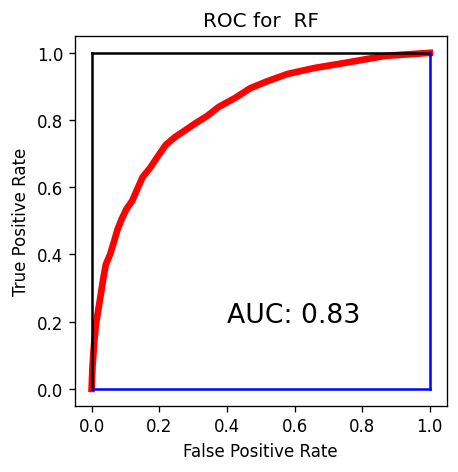

In [113]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model_grid.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [114]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [115]:
si = []
for k in range(2, 20,1):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(X)
 score = silhouette_score(X, kmeans.labels_)
 si.append(score)

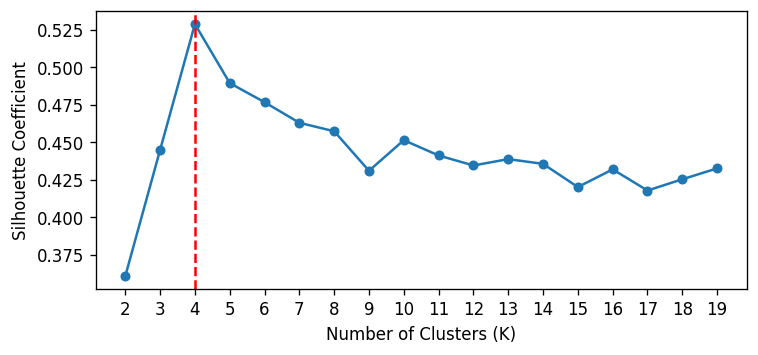

In [116]:
plt.plot(range(2, 20), si,'.-',markersize=10)
plt.xticks(range(2, 20))
plt.axvline(x=4, color='r', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Coefficient")
plt.show()

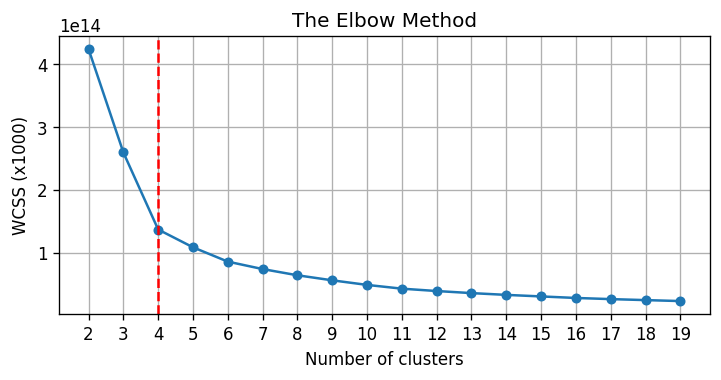

In [117]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_/1000)
plt.plot(range(2, 20), wcss,'.-',markersize=10)
plt.xticks(range(2, 20))
plt.axvline(x=4, color='r', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (x1000)')
plt.grid(linestyle='-')
plt.show()

In [118]:
kmeans = KMeans(n_clusters = 4)
y_pred = kmeans.fit_predict(X)

In [119]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [120]:
finaldf.head(5)

,tenure,credit_score,age,estimated_salary,products_number,balance,gender,credit_card,active_member,churn
0,2,619,42,10134888,1,0,0,1,1,1
1,1,608,41,11254258,1,8380786,0,0,1,0
2,8,502,42,11393157,3,1596608,0,1,0,1
3,1,699,39,9382663,2,0,0,0,0,0
4,2,850,43,790841,1,12551082,0,1,1,0


In [121]:
a=kmeans.predict([[0,619,40,100000,1,0,0,1,0]])

C:\Users\maitu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [122]:
finaldf['Class']=y_pred

In [123]:
finaldf.sample(3)

,tenure,credit_score,age,estimated_salary,products_number,balance,gender,credit_card,active_member,churn,Class
8574,4,717,59,17052863,2,0,0,1,1,0,3
9804,9,637,36,7250476,1,16693988,0,1,1,0,1
2087,7,716,52,14608,2,6597161,0,1,0,1,1


<Axes: xlabel='age', ylabel='Count'>

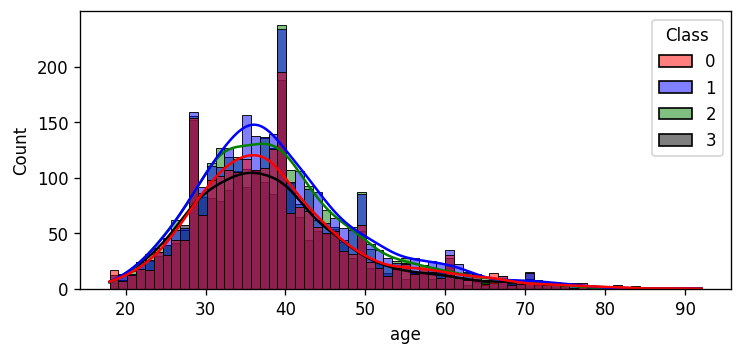

In [124]:
import seaborn as sns
palette = ['red', 'blue','green','k']
sns.histplot(x='age',hue= 'Class', data= finaldf, palette=palette, kde=True)